# Supervised Learning Exercise: Predict survival on the Titanic

In this exercise, you will be given the Titanic dataset (https://www.kaggle.com/competitions/titanic/data), which contains data for 891 of the real Titanic passengers and the goal is to practice the machine learning application development process to predict which passengers survived the Titanic shipwreck and determine the factors that contributed to their survival. The dataset consists of the following ten features:

- PassengerId
- Survived: Survival (0 = No, 1 = Yes) - This is the target feature.
- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name
- Sex
- Age: Age in years
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


## Tasks

- Run data exploration, visualization, and preparation
- Train models
- Evaluate models

### 1. Environment Preparation

In [1]:
# Install packages

#!pip install pandas numpy matplotlib seaborn scikit-learn yellowbrick

In [2]:
# Import packages

import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # data visualization
import seaborn as sb # data visualization

from sklearn.model_selection import train_test_split, KFold, cross_val_score # data spliting and k-cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from yellowbrick.style import set_palette
from yellowbrick.classifier import ClassificationReport, ROCAUC, ConfusionMatrix, ClassPredictionError

### 2. Data Exploration 

In [3]:
# Load the data from the CSV to a Panda's Dataframe
titanic_df = pd.read_csv(filepath_or_buffer='titanic.csv')

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# View some basic statistical details of the numeric columns
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# View some basic statistical details of the non-numeric columns
titanic_df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
# Display the normalized counts of unique values of all non-numeric columns
from IPython.display import display_html
valcnt_df_html_stylers = []
for column in titanic_df.select_dtypes(include=['object'])[1:]:
    valcnt_df = pd.DataFrame(titanic_df[column].value_counts(sort=True, normalize=True))
    valcnt_df_styler = valcnt_df.style.set_table_attributes("style='display:inline'").set_caption(column)
    valcnt_df_html_stylers.append(valcnt_df_styler._repr_html_())
display_html(''.join(valcnt_df_html_stylers), raw=True)

,Name
"Braund, Mr. Owen Harris",0.001122
"Boulos, Mr. Hanna",0.001122
"Frolicher-Stehli, Mr. Maxmillian",0.001122
"Gilinski, Mr. Eliezer",0.001122
"Murdlin, Mr. Joseph",0.001122
"Rintamaki, Mr. Matti",0.001122
"Stephenson, Mrs. Walter Bertram (Martha Eustis)",0.001122
"Elsbury, Mr. William James",0.001122
"Bourke, Miss. Mary",0.001122
"Chapman, Mr. John Henry",0.001122


### 3. Data Visualization

In [9]:
# Set the Seaborn plot theme
sb.set(style = "darkgrid") 

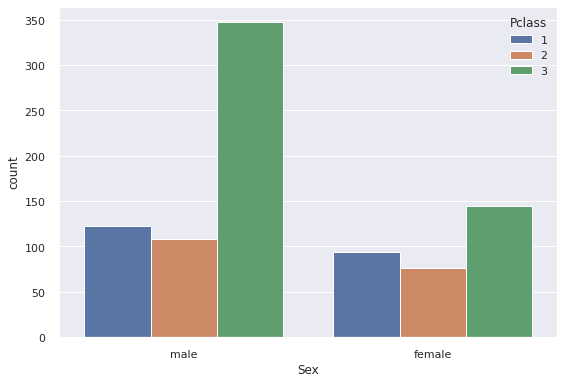

In [10]:
# Create a count plot
sb.countplot(x='Sex', hue='Pclass', data=titanic_df)
plt.show()

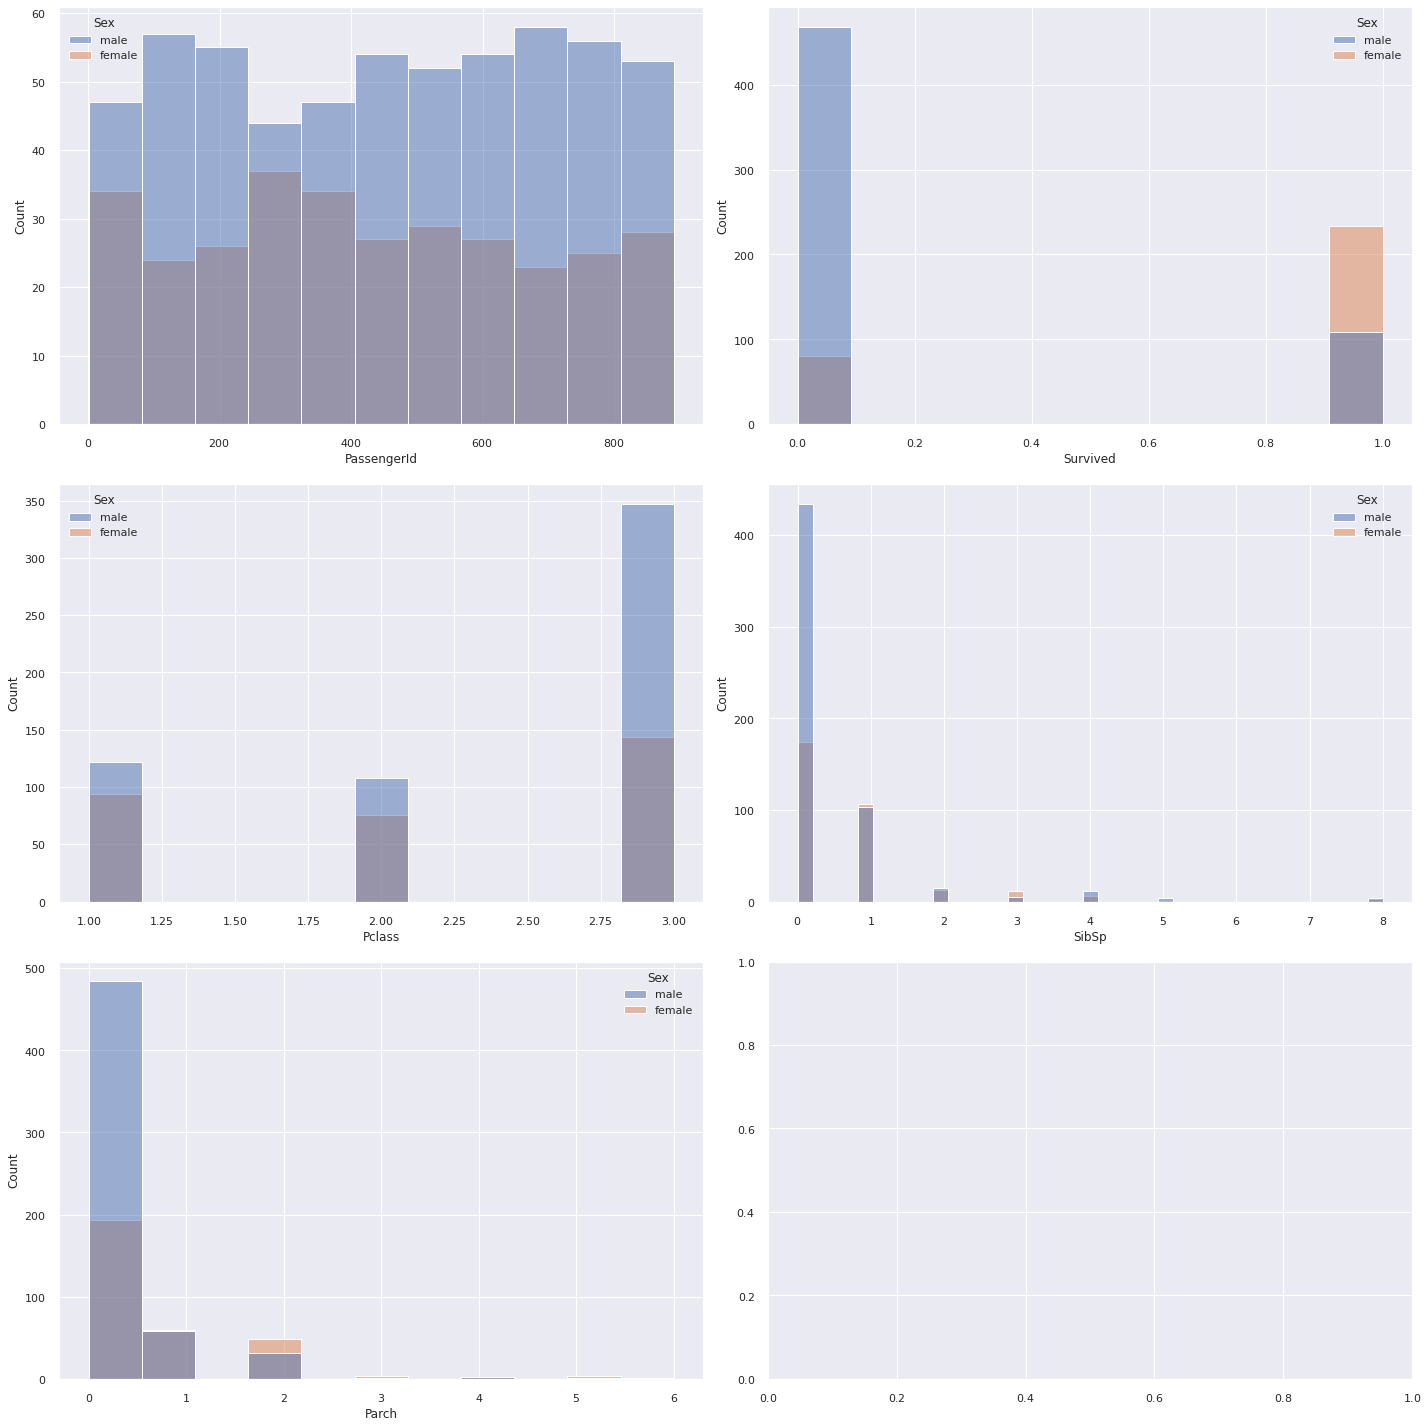

In [11]:
# Create a histogram plots to show numeric feature distributions across target feature
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
axes = axes.flatten()
index = 0
for column in titanic_df.select_dtypes(include=['int64']):
    sb.histplot(x=column, hue="Sex", data=titanic_df, ax=axes[index])
    index+=1

Locator attempting to generate 3745 ticks ([-34.4, ..., 714.4000000000107]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3745 ticks ([-34.4, ..., 714.4000000000107]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3745 ticks ([-34.4, ..., 714.4000000000107]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3745 ticks ([-34.4, ..., 714.4000000000107]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3745 ticks ([-34.4, ..., 714.4000000000107]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3745 ticks ([-34.4, ..., 714.4000000000107]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3745 ticks ([-34.4, ..., 714.4000000000107]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3745 ticks ([-34.4, ..., 714.4000000000107]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3745 ticks ([-34.4, ..., 714.400000000010

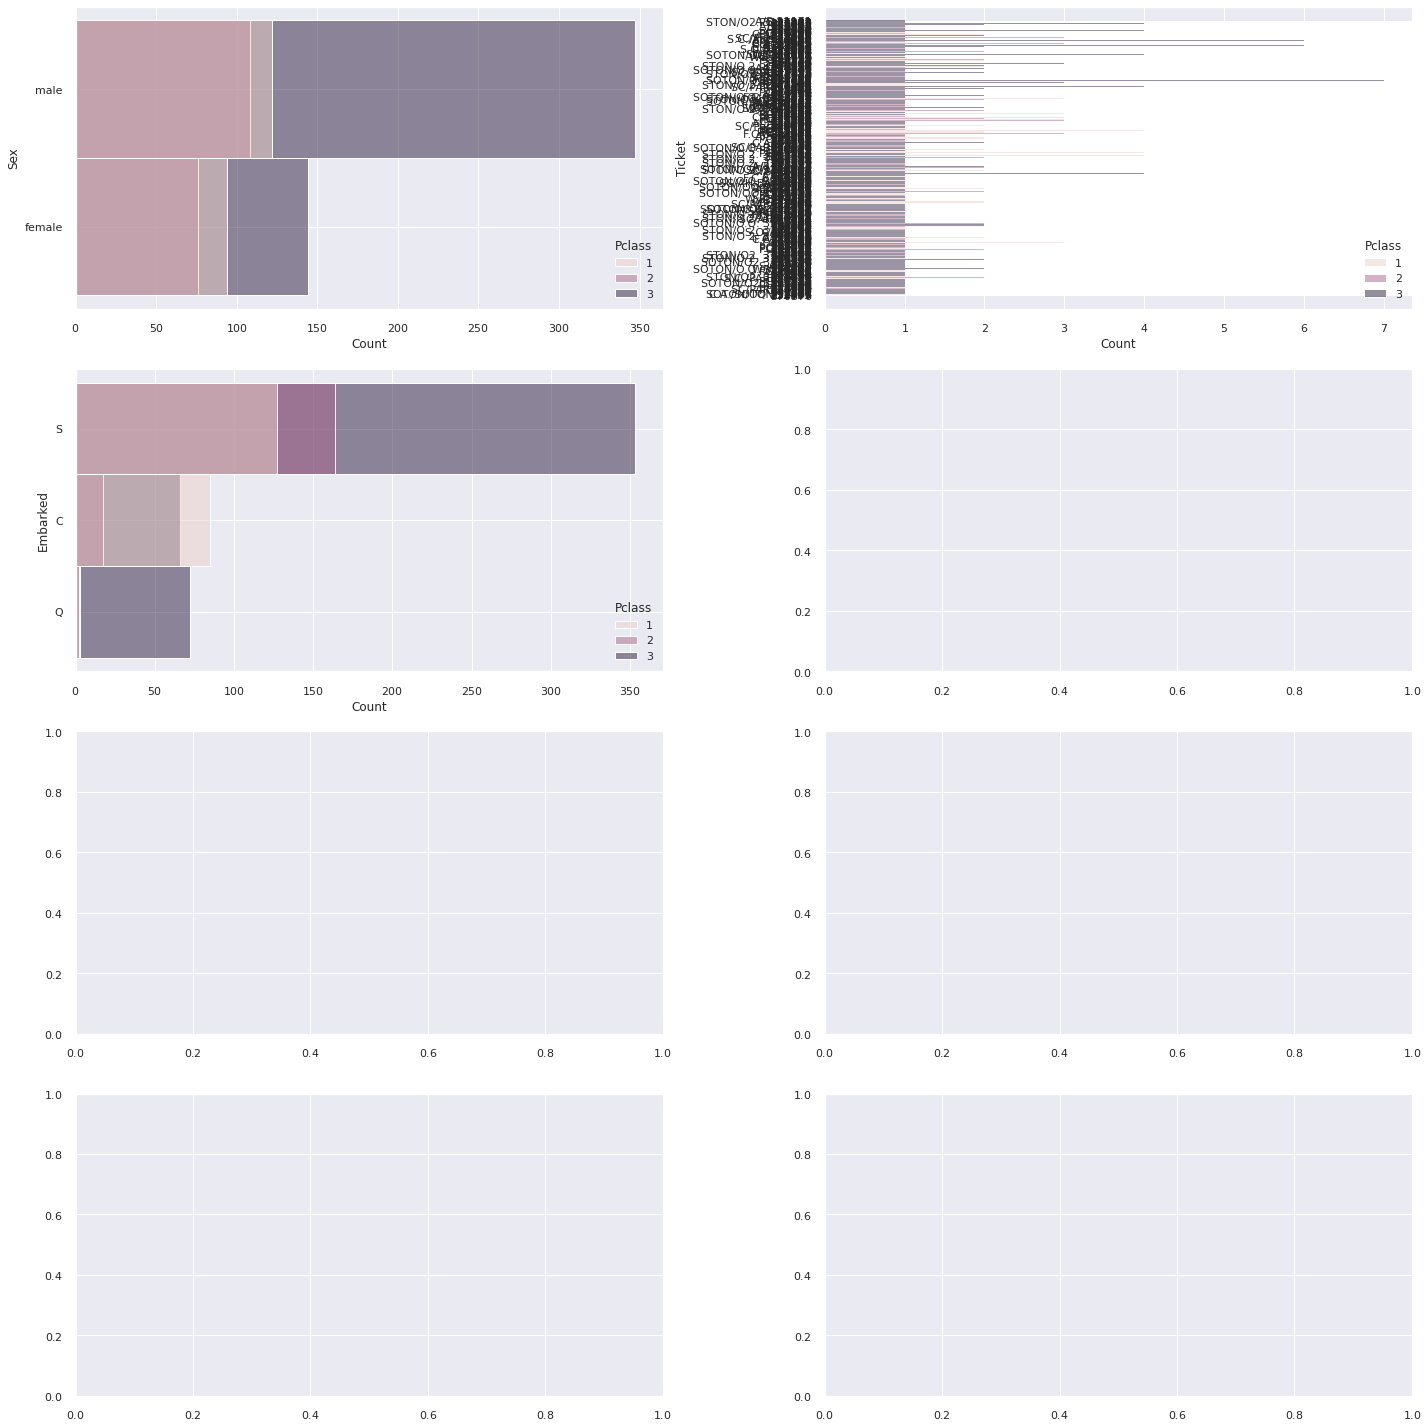

In [12]:
# Create histogram plots to show non-numeric feature distributions across target feature
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
axes = axes.flatten()
index = 0
for column in titanic_df.select_dtypes(include=['object']):
    if(column not in ['Name', 'Cabin']):
        sb.histplot(y=column, hue="Pclass", data=titanic_df, ax=axes[index])
        index+=1

### 4. Data Preparation

In [13]:
# Drop the country and education-num columns
titanic_df.drop(['PassengerId', 'Name', 'Parch', 'SibSp', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [17]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


### 5. Training Set & Test Set

### 6. Building Models